# Assignment No. - 11 : Clustering (Hierarchical, Kmeans & DBSCAN)

# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

**Data Description:**
* Murder -- Muder rates in different places of United States
* Assualt- Assualt rate in different places of United States
* UrbanPop - urban population in different places of United States
* Rape - Rape rate in different places of United States


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Initial Analysis

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
crime_data.duplicated().sum()

0

In [8]:
crime_data.describe(include = 'all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


# Data Preparation

In [9]:
crime_data.rename(columns = {"Unnamed: 0":"States"}, inplace=True)
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
scalar = MinMaxScaler()
scalar=scalar.fit_transform(crime_data.iloc[:,1:])

In [11]:
scaled_data = pd.DataFrame(scalar,columns=['Murder','Assault','UrbanPop','Rape'])
scaled_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# Hierarchical Clustering

####  Method : Single

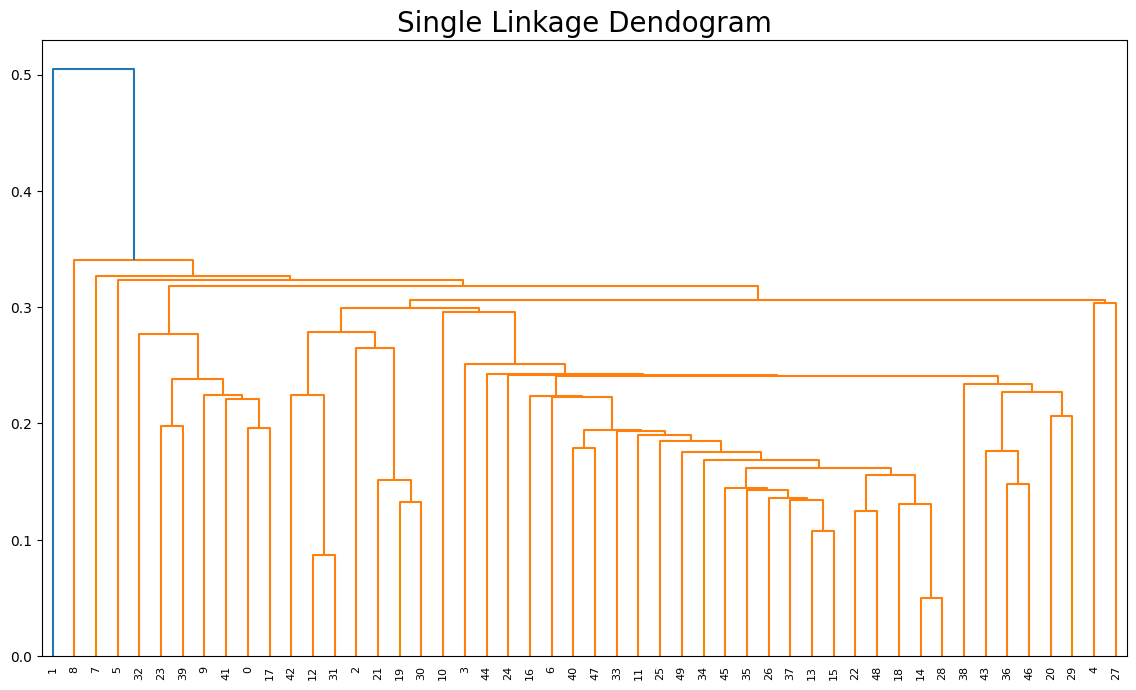

In [12]:
fig = plt.figure(figsize = (14,8))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'single'))
plt.title('Single Linkage Dendogram', size = 20)
plt.show()

In [13]:
hie_clustering_1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

In [14]:
pred_y_1 = hie_clustering_1.fit_predict(scaled_data)

In [15]:
crime_data['Cluster'] = pred_y_1
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [16]:
crime_data['Cluster'].value_counts()

0    49
1     1
Name: Cluster, dtype: int64

####  Method : Complete

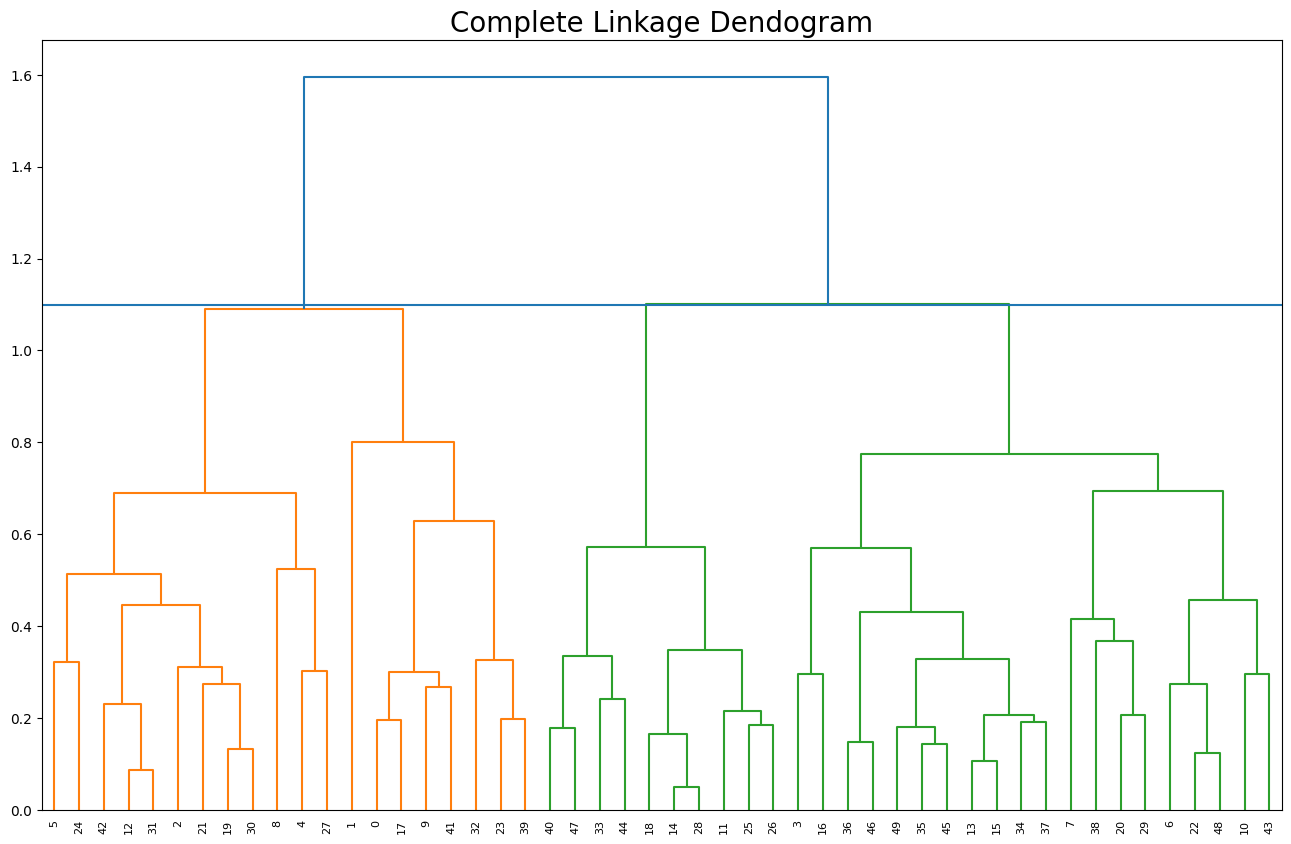

In [17]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 20)
plt.axhline(y=1.1)
plt.show()

In [18]:
hie_clustering_2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

In [19]:
pred_y_2 = hie_clustering_2.fit_predict(scaled_data)

In [20]:
crime_data['Cluster'] = pred_y_2
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [21]:
crime_data['Cluster'].value_counts()

1    20
3    12
2    10
0     8
Name: Cluster, dtype: int64

####  Method : Average

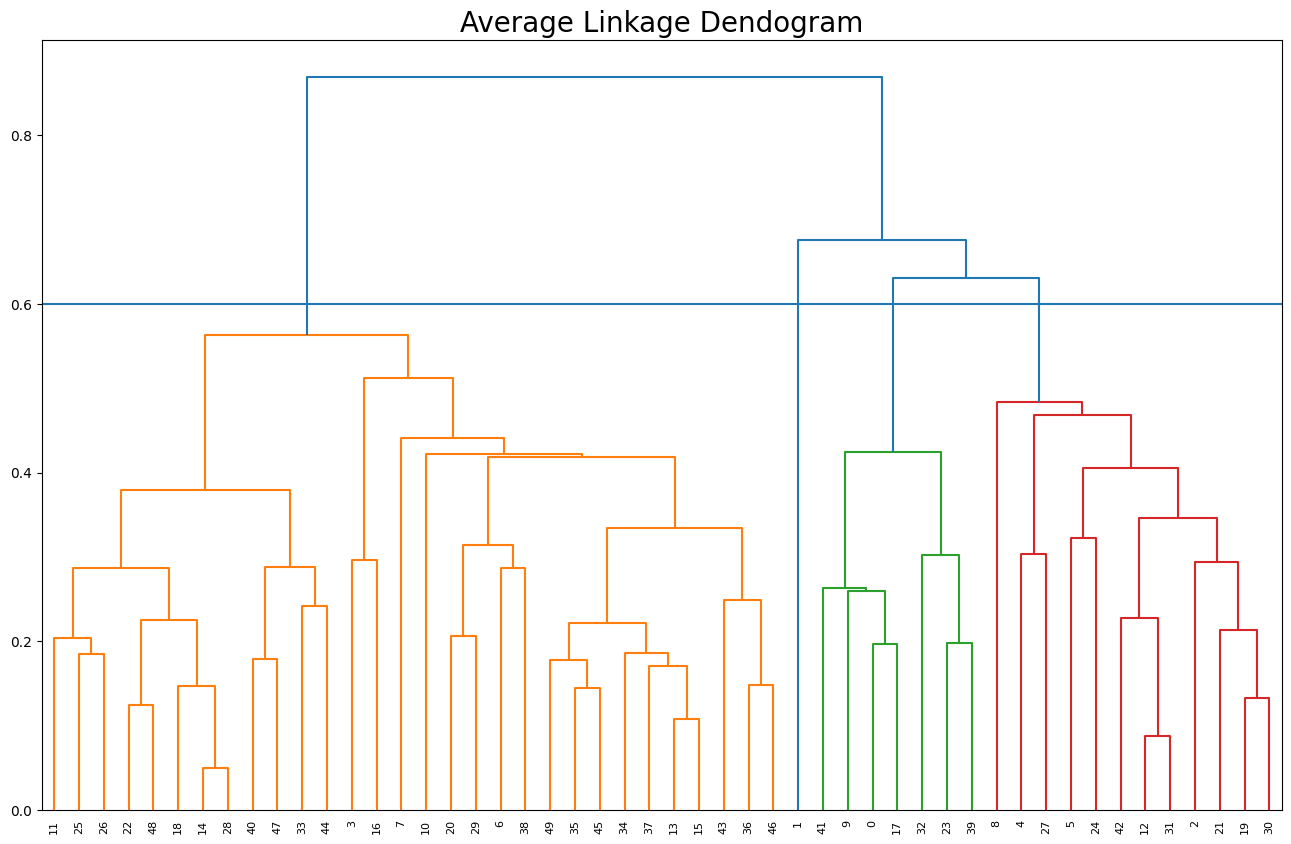

In [22]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'average'))
plt.title('Average Linkage Dendogram', size = 20)
plt.axhline(y=0.6);

In [23]:
hie_clustering_3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')

In [24]:
pred_y_3 = hie_clustering_3.fit_predict(scaled_data)

In [25]:
crime_data['Cluster'] = pred_y_3
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [26]:
crime_data['Cluster'].value_counts()

0    30
1    12
3     7
2     1
Name: Cluster, dtype: int64

####  Method : Ward

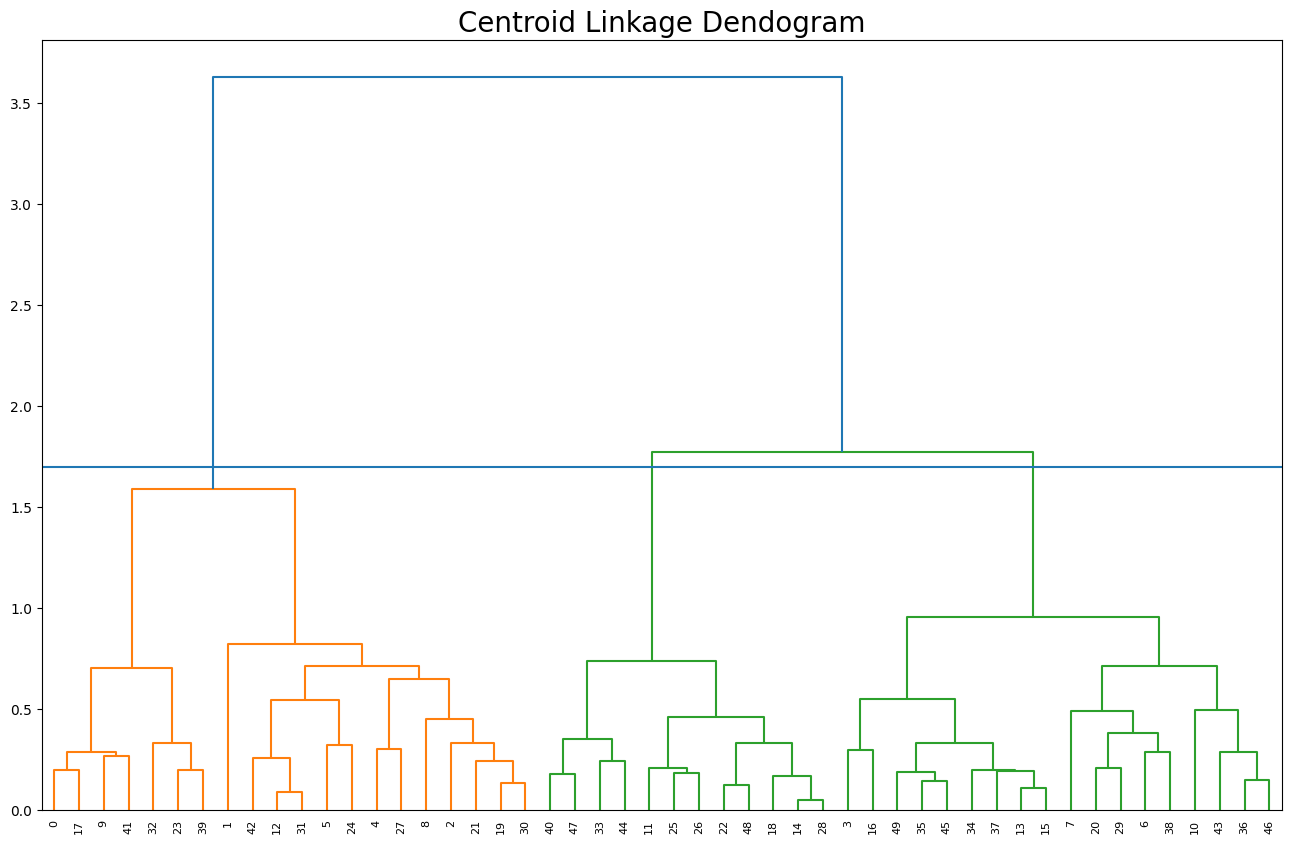

In [27]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.title('Centroid Linkage Dendogram', size = 20)
plt.axhline(y=1.7)
plt.show()

In [28]:
hie_clustering_4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [29]:
pred_y_4 = hie_clustering_4.fit_predict(scaled_data)

In [30]:
crime_data['Cluster'] = pred_y_4
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [31]:
crime_data['Cluster'].value_counts()

0    20
1    18
2    12
Name: Cluster, dtype: int64

In [32]:
#pip install -U threadpoolctl

#  K-Means Clustering

In [33]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 12)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

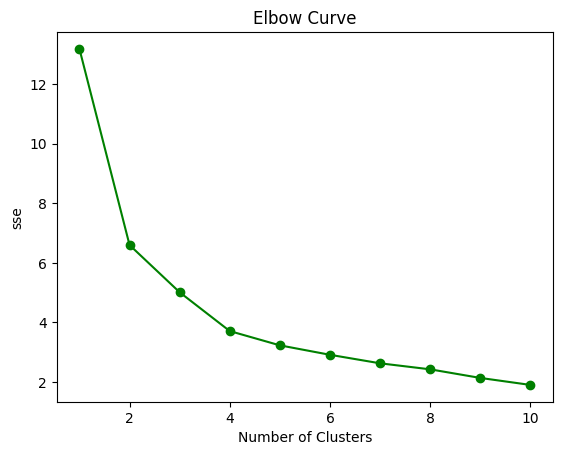

In [34]:
plt.plot(range(1,11), sse, 'bo-', color = 'g')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('sse')
plt.show()

From the above Elbow curve we can say that 4 clusters can be formed,because exact position of Elbow is at 4.

In [35]:
kmeans_cluster = KMeans(4, random_state = 42)
kmeans_cluster.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [36]:
y_pred_k=kmeans_cluster.fit_predict(scaled_data)

In [37]:
crime_data['Cluster'] = y_pred_k
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3


In [38]:
crime_data['Cluster'].value_counts()

0    16
3    13
1    13
2     8
Name: Cluster, dtype: int64

# DBSCAN Clustering

In [39]:
dbscan = DBSCAN(eps = 0.3, min_samples = 3)
dbscan.fit(scaled_data)

DBSCAN(eps=0.3, min_samples=3)

In [40]:
pred_db=dbscan.fit_predict(scaled_data)

In [41]:
crime_data['Cluster_DBSCAN'] = pred_db
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster,Cluster_DBSCAN
0,Alabama,13.2,236,58,21.2,2,0
1,Alaska,10.0,263,48,44.5,3,-1
2,Arizona,8.1,294,80,31.0,3,1
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,3,-1


### Evaluating Clustering methods with the help of Silhouette Score

The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [42]:
silhouette_SLM = (metrics.silhouette_score(scaled_data,pred_y_1))
silhouette_SLM

0.21033337025958487

In [43]:
silhouette_CLM = (metrics.silhouette_score(scaled_data,pred_y_2))
silhouette_CLM

0.3060729442426308

In [44]:
silhouette_ALM = (metrics.silhouette_score(scaled_data,pred_y_3))
silhouette_ALM

0.36992391140277175

In [45]:
silhouette_CenLM = (metrics.silhouette_score(scaled_data,pred_y_4))
silhouette_CenLM

0.31916915428121284

In [46]:
silhouette_KMeans = (metrics.silhouette_score(scaled_data,y_pred_k))
silhouette_KMeans

0.3349095719865253

In [47]:
silhouette_DBSCAN = (metrics.silhouette_score(scaled_data,pred_db))
silhouette_DBSCAN

0.2473858809927262

In [48]:
table = {'Clustering Models' : ['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage', 
                                'HC Centroid Linkage', 'KMeans', 'DBSCAN'], 
          'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM, 
                                silhouette_KMeans, silhouette_DBSCAN]
        }

table = pd.DataFrame(table)
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.210333
1,HC Complete Linkage,0.306073
2,HC Average Linkage,0.369924
3,HC Centroid Linkage,0.319169
4,KMeans,0.334910
5,DBSCAN,0.247386


## Conclusion

From the above table, it is evident that different types of hierarchical clustering is way more complex to understand and Average Linkage is giving better result compared to other hierarchical clustering.From all the clustering methods KMeans Clustering also provides the better result with 4 clusters.

# 2) Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
**Draw the inferences from the clusters obtained.**

**Data Description:**
 
* The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

* ID --Unique ID
* Balance--Number of miles eligible for award travel
* Qual_mile--Number of miles counted as qualifying for Topflight status
* cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
* cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
* cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
* 1 = under 5,000
* 2 = 5,000 - 10,000
* 3 = 10,001 - 25,000
* 4 = 25,001 - 50,000
* 5 = over 50,000
* Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
* Bonus_trans--Number of non-flight bonus transactions in the past 12 months
* Flight_miles_12mo--Number of flight miles in the past 12 months
* Flight_trans_12--Number of flight transactions in the past 12 months
* Days_since_enrolled--Number of days since enrolled in flier program
* Award--whether that person had award flight (free flight) or not

## Importing  Data

In [99]:
airlines_data = pd.read_csv("EastWestAirlines.csv")
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [100]:
# Initial Analysis

In [101]:
airlines_data.shape

(3999, 12)

In [51]:
airlines_data.shape

(3999, 12)

In [52]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [53]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [54]:
airlines_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [55]:
airlines_data.duplicated().sum()

0

In [56]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Data Preparation

In [57]:
airlines_data.drop('ID#', axis = 1,inplace=True)

In [58]:
airlines_data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [59]:
scalar = MinMaxScaler()
scalar=scalar.fit_transform(airlines_data)

In [60]:

scaled_data = pd.DataFrame(scalar,columns=airlines_data.columns)
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


# Hierarchical Clustering

####  Single Linkage method

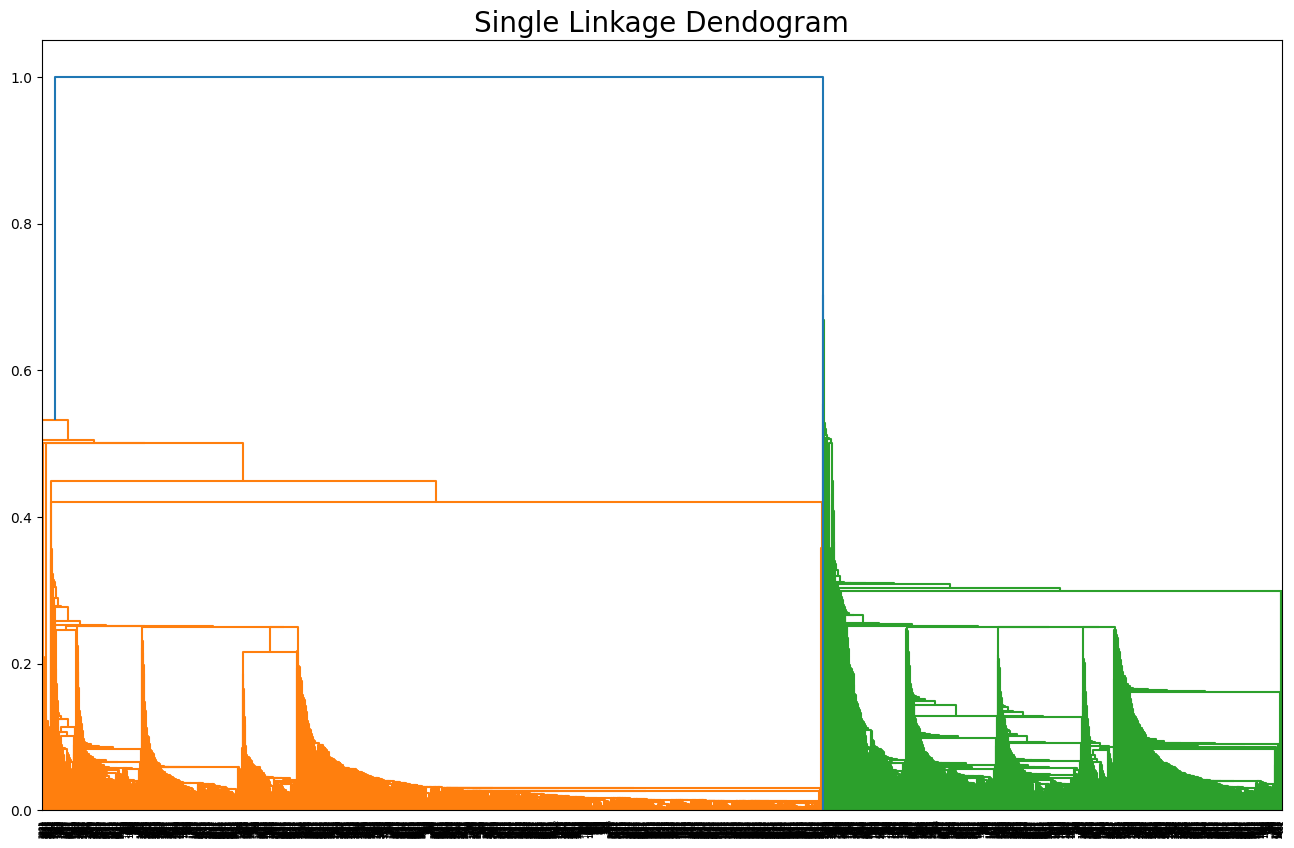

In [61]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'single'))
plt.title('Single Linkage Dendogram', size = 20);

In [62]:
hc_single = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')

In [63]:
y_hc_single = hc_single.fit_predict(scaled_data)

In [64]:
airlines_data['Cluster'] = y_hc_single
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [65]:
airlines_data['Cluster'].value_counts()

0    2518
1    1478
4       1
3       1
2       1
Name: Cluster, dtype: int64

####  Complete Linkage Method

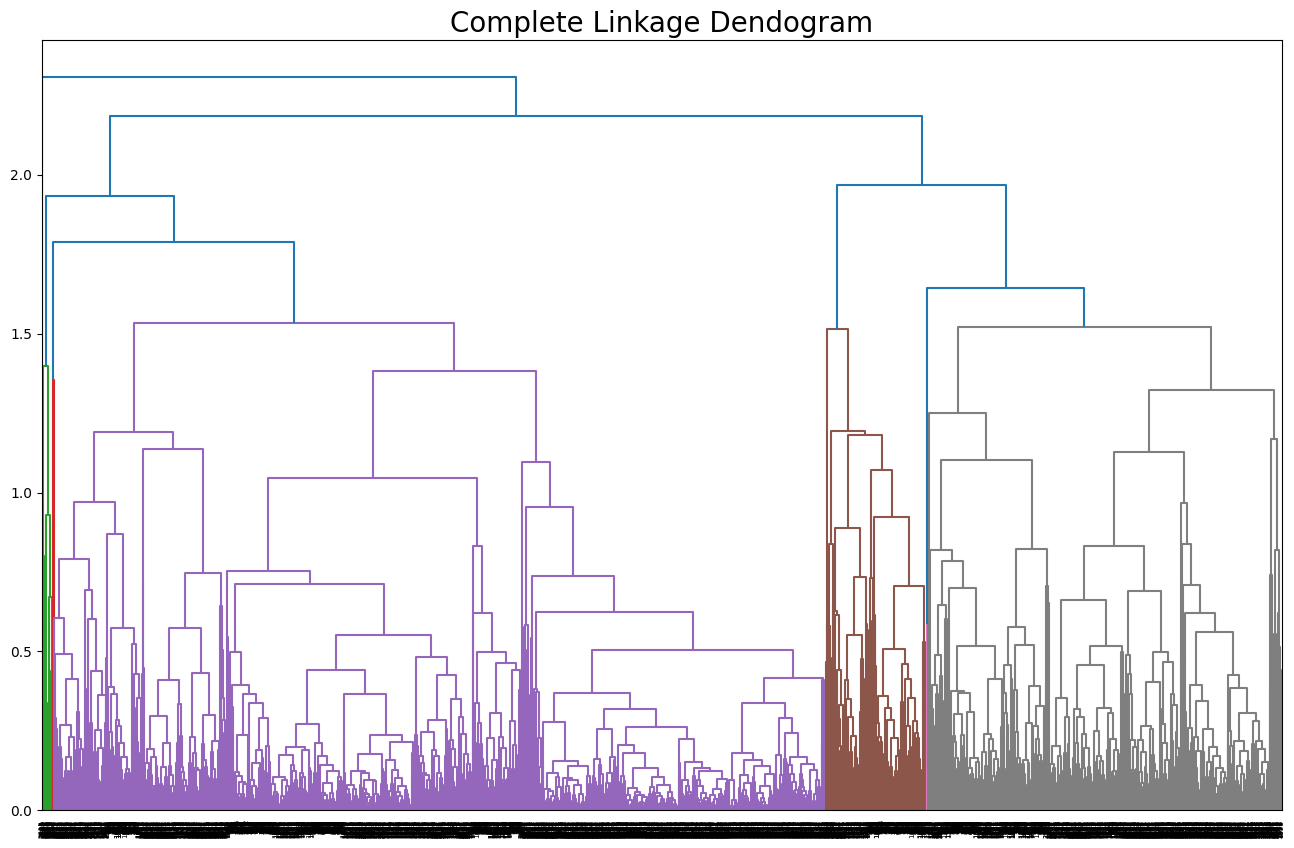

In [66]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 20);

In [67]:
hc_complete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [68]:
y_hc_complete = hc_complete.fit_predict(scaled_data)

In [69]:
airlines_data['Cluster'] = y_hc_complete
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [70]:
airlines_data['Cluster'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: Cluster, dtype: int64

####  Average Linkage Method

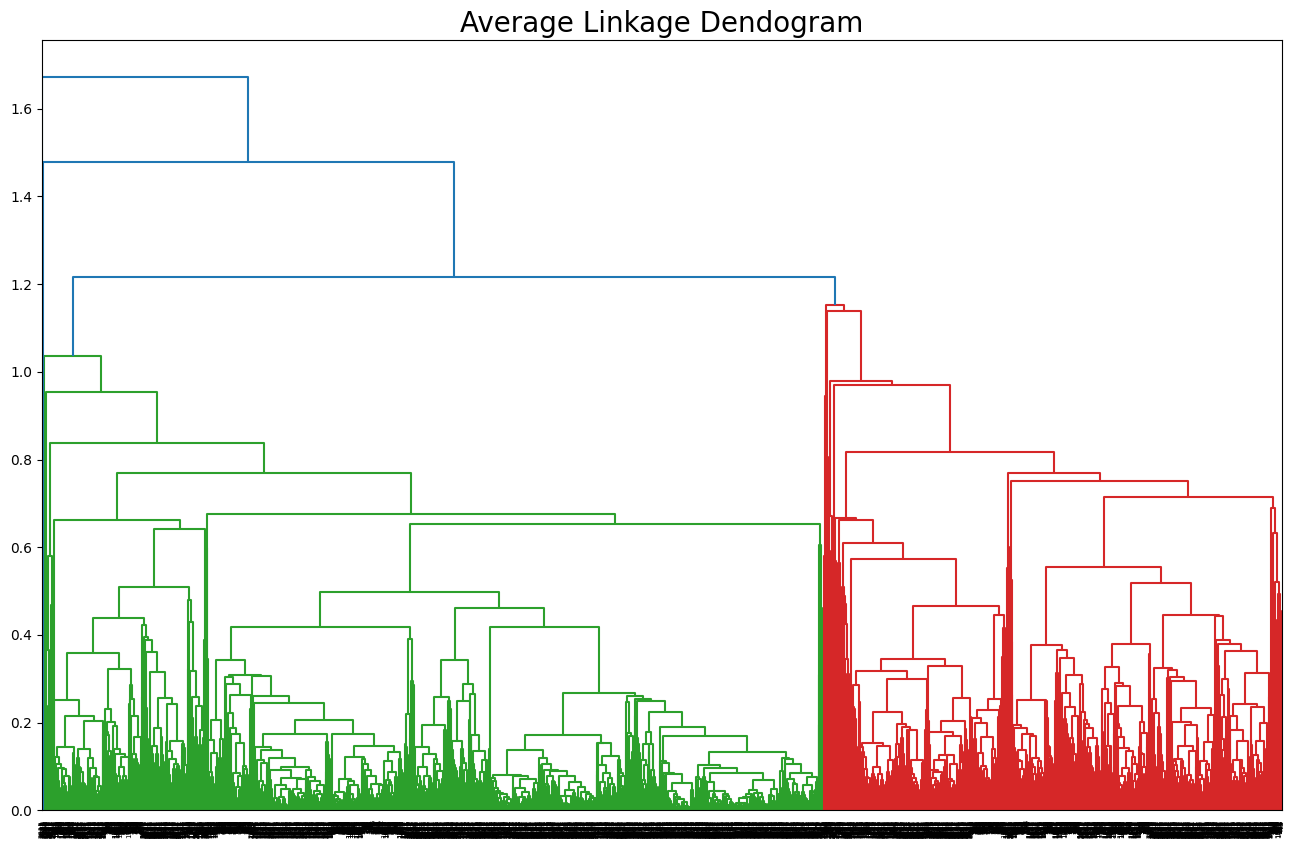

In [71]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'average'))
plt.title('Average Linkage Dendogram', size = 20);

In [72]:
hc_ave = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')

In [73]:
y_hc_ave = hc_ave.fit_predict(scaled_data)

In [74]:
airlines_data['Cluster'] = y_hc_ave
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [75]:
airlines_data['Cluster'].value_counts()

1    2518
0    1468
4       8
3       4
2       1
Name: Cluster, dtype: int64

#### Ward Linkage Method

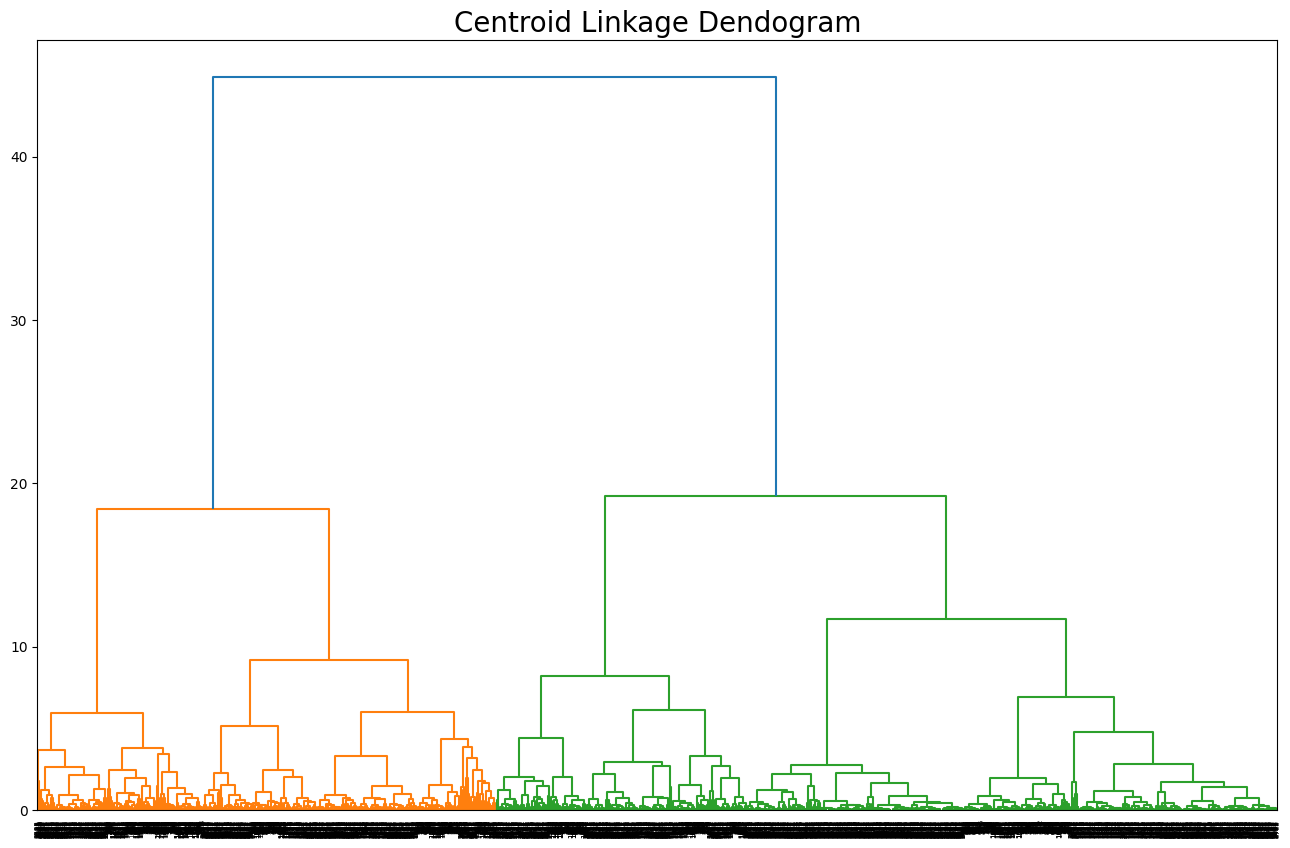

In [76]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.title('Centroid Linkage Dendogram', size = 20);

In [77]:
hc_ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [78]:
y_hc_ward = hc_ward.fit_predict(scaled_data)

In [79]:
airlines_data['Cluster'] = y_hc_ward
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [80]:
airlines_data['Cluster'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: Cluster, dtype: int64

# K-Means Clustering

In [81]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 13)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

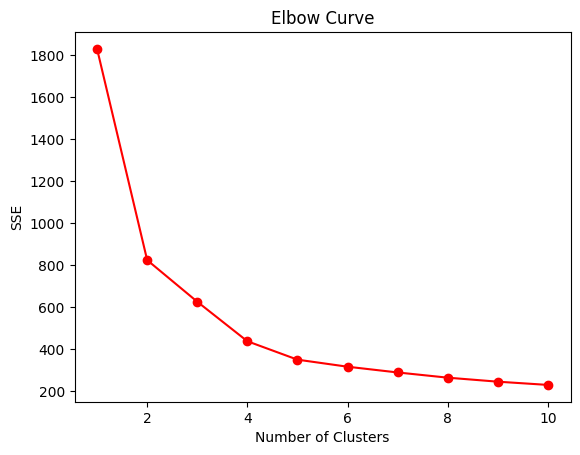

In [82]:
plt.plot(range(1,11), sse, 'bo-', color = 'r')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

From the above Elbow Curve we can say that we get 5 clusters.

In [83]:
k_means = KMeans(5, random_state = 42)
k_means.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [84]:
pred_kmeans=k_means.fit_predict(scaled_data)

In [85]:
airlines_data['Cluster'] = pred_kmeans
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [86]:
airlines_data['Cluster'].value_counts()

4    1032
1     868
0     808
2     673
3     618
Name: Cluster, dtype: int64

# DBSCAN Clustering

In [87]:
dbscan = DBSCAN(eps = 0.9, min_samples = 5)
dbscan.fit(scaled_data)

DBSCAN(eps=0.9)

In [88]:
db_pred=dbscan.fit_predict(scaled_data)

In [89]:
airlines_data['Cluster'] = db_pred
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


### Evaluating Clustering methods with the help of Silhouette Score

In [90]:
silhouette_SLM = (metrics.silhouette_score(scaled_data,y_hc_single))
silhouette_SLM

0.48005487141025094

In [91]:
silhouette_CLM = (metrics.silhouette_score(scaled_data,y_hc_complete))
silhouette_CLM

0.4167248248554338

In [92]:
silhouette_ALM = (metrics.silhouette_score(scaled_data,y_hc_ave))
silhouette_ALM

0.5082555071160846

In [93]:
silhouette_CenLM = (metrics.silhouette_score(scaled_data,y_hc_ward))
silhouette_CenLM

0.3762586351398372

In [94]:
silhouette_KMeans = (metrics.silhouette_score(scaled_data,pred_kmeans))
silhouette_KMeans

0.4430672072796034

In [95]:
silhouette_DBSCAN = (metrics.silhouette_score(scaled_data,db_pred))
silhouette_DBSCAN

0.535930510919477

In [96]:
table = {'Clustering Models' : ['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage', 'HC Centroid Linkage', 'KMeans', 'DBSCAN'], 'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM, silhouette_KMeans, silhouette_DBSCAN]}
table = pd.DataFrame(table)
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.480055
1,HC Complete Linkage,0.416725
2,HC Average Linkage,0.508256
3,HC Centroid Linkage,0.376259
4,KMeans,0.443067
5,DBSCAN,0.535931


## Conclusion

From the above table, it is evident that different types of hierarchical clustering is way more complex to understand and Average Linkage is giving better result compared to other hierarchical clustering. From all the clustering methods DBSCAN Clustering also provides the better result.